# WARG COMPUTER VISION BOOTCAMP
## CLASSIFY IMAGES WITH MANUAL CNN

In [12]:
import tensorflow as tf
import matplotlib.pyplot as plt

### Load Data

In [13]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

### Set up model

In [14]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform'),
    tf.keras.layers.Dense(10, activation='softmax')
])

### Define loss function

In [15]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
# sgd_opt = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)

### Compile Model

In [16]:
model.compile(
    optimizer='adam',
    loss=loss_fn,
    metrics=['accuracy']
)
# model.compile(optimizer=sgd_opt, loss='categorical_crossentropy', metrics=['accuracy'])

### Train Model

In [19]:
training_history = model.fit(x_train, y_train, epochs=30, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/30
782/782 [==============================] - 107s 137ms/step - loss: 0.3956 - accuracy: 0.8604 - val_loss: 0.7680 - val_accuracy: 0.7664
Epoch 2/30
782/782 [==============================] - 122s 156ms/step - loss: 0.3196 - accuracy: 0.8878 - val_loss: 0.8780 - val_accuracy: 0.7477
Epoch 3/30
782/782 [==============================] - 174s 223ms/step - loss: 0.2636 - accuracy: 0.9050 - val_loss: 0.8968 - val_accuracy: 0.7606
Epoch 4/30
782/782 [==============================] - 174s 222ms/step - loss: 0.2160 - accuracy: 0.9228 - val_loss: 1.0410 - val_accuracy: 0.7553
Epoch 5/30
782/782 [==============================] - 59720s 76s/step - loss: 0.1863 - accuracy: 0.9346 - val_loss: 0.9533 - val_accuracy: 0.7614
Epoch 6/30
782/782 [==============================] - 82s 105ms/step - loss: 0.1580 - accuracy: 0.9434 - val_loss: 1.1127 - val_accuracy: 0.7682
Epoch 7/30
782/782 [==============================] - 103s 132ms/step - loss: 0.1523 - accuracy: 0.9471 - val_loss: 1.0356 - 

KeyboardInterrupt: 

### Validate

In [ ]:
validation_history = model.evaluate(x_test,  y_test, verbose=2)

313/313 - 2s - loss: 1.3721 - accuracy: 0.5114 - 2s/epoch - 8ms/step


### Visualize

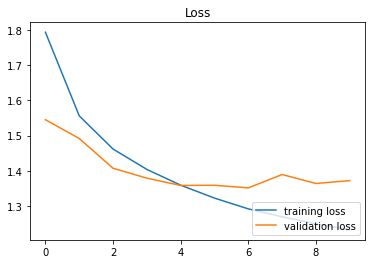

In [ ]:
fig = plt.figure()
plt.plot(range(10), training_history.history['loss'], label="training loss")
plt.plot(range(10), training_history.history['val_loss'], label="validation loss")
plt.legend(loc='lower right')
plt.title("Loss")
plt.savefig('training_loss.jpg')